<a href="https://colab.research.google.com/github/Jaomiew/DPDM2023/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
from sklearn import datasets
iris = datasets.load_iris()

In [124]:
import numpy as np

In [125]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [126]:
print(iris['DESCR'][:500])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                



In [127]:
test_data_0 = iris['data'][:5,:]
test_data_1 = iris['data'][50:55,:]
test_data_2 = iris['data'][100:105,:]

train_data_0 = iris['data'][5:50,:]
train_data_1 = iris['data'][55:100,:]
train_data_2 = iris['data'][105:150,:]

In [128]:
test_label_0 = iris['target'][:5]
test_label_1 = iris['target'][50:55]
test_label_2 = iris['target'][100:105]

train_label_0 = iris['target'][5:50]
train_label_1 = iris['target'][55:100]
train_label_2 = iris['target'][105:]

In [129]:
test_data = np.concatenate([test_data_0,test_data_1,test_data_2])
train_data = np.concatenate([train_data_0,train_data_1,train_data_2])
test_labels = np.concatenate([test_label_0, test_label_1, test_label_2])
train_labels = np.concatenate([train_label_0, train_label_1, train_label_2])

##HW4

write your own KNN algorithm using sorting function from HW2 (The function should take 3 parameters: 1: training data, 2: test data, and 3: K)

In [130]:
import numpy as np

#ฟังก์ชันหา ระยะห่าง
def eu_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

#ฟังก์ชันหาว่าตัวไหนใกล้ที่สุด
def find_k_nearest_indices(distances, k):
    n_indices = []
    for i in range(k):
        min_distance = float("inf")
        min_index = -1
        for j in range(len(distances)):
            if j not in n_indices:
                if distances[j] < min_distance:
                    min_distance = distances[j]
                    min_index = j
        n_indices.append(min_index)
    return n_indices

#ฟังก์ชัน knn หลัก
def knn(train_data, train_labels, test_data, k):
    test_labels = []
    for test_p in test_data:
        distances = [eu_distance(test_p, train_p) for train_p in train_data] #วิ่งไปหาฟังก์ชั่นระยะห่าง

        nearest_indices = find_k_nearest_indices(distances, k)
        nearest_labels = [train_labels[i] for i in nearest_indices]

        predicted_label = np.bincount(nearest_labels).argmax()
        test_labels.append(predicted_label)

    return np.array(test_labels)

In [131]:
pred = knn(train_data, train_labels, test_data, 3)
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

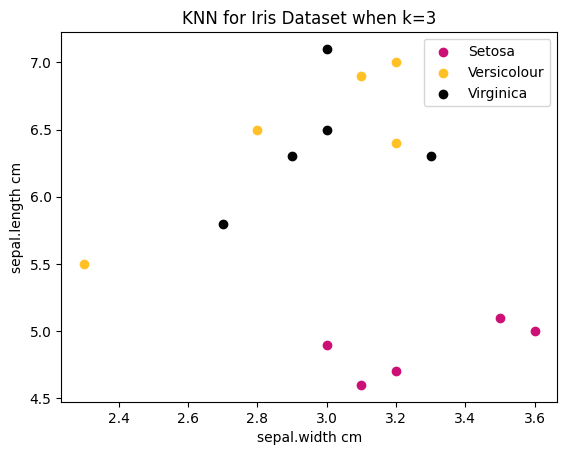

In [132]:
import matplotlib.pyplot as plt
names = ['Setosa', 'Versicolour', 'Virginica']
colors = ['#CD1076', '#FFC125', '#030303']

for i in range(len(names)):
    class_indices = np.where(test_labels == i)[0]
    plt.scatter(test_data[class_indices, 1], test_data[class_indices, 0], label=names[i], c=colors[i])

plt.xlabel('sepal.width cm')
plt.ylabel('sepal.length cm')
plt.title(f'KNN for Iris Dataset when k=3')


plt.legend()
plt.show()

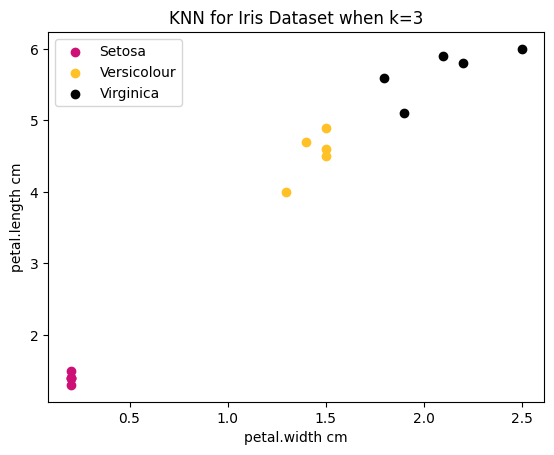

In [133]:
for i in range(len(names)):
    class_indices = np.where(test_labels == i)[0]
    plt.scatter(test_data[class_indices, 3], test_data[class_indices, 2], label=names[i], c=colors[i])

plt.xlabel('petal.width cm')
plt.ylabel('petal.length cm')
plt.title(f'KNN for Iris Dataset when k=3')

plt.legend()
plt.show()

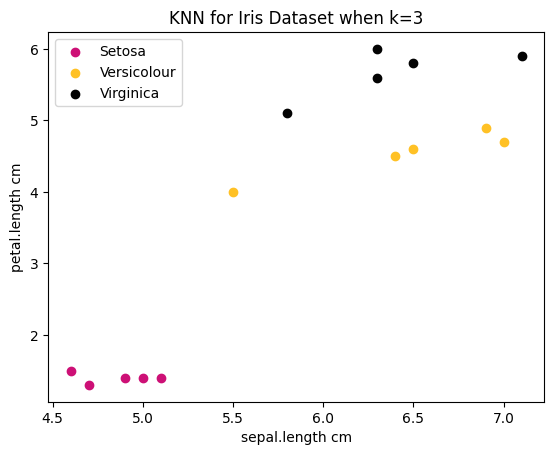

In [134]:
for i in range(len(names)):
    class_indices = np.where(test_labels == i)[0]
    plt.scatter(test_data[class_indices, 0], test_data[class_indices, 2], label=names[i], c=colors[i])

plt.xlabel('sepal.length cm')
plt.ylabel('petal.length cm')
plt.title(f'KNN for Iris Dataset when k=3')

plt.legend()
plt.show()

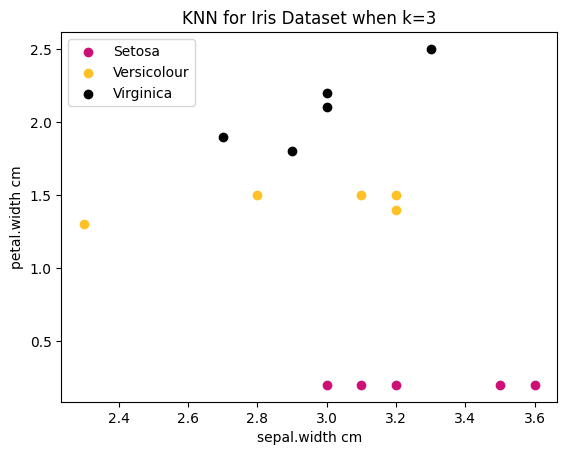

In [135]:
for i in range(len(names)):
    class_indices = np.where(test_labels == i)[0]
    plt.scatter(test_data[class_indices, 1], test_data[class_indices, 3], label=names[i], c=colors[i])

plt.xlabel('sepal.width cm')
plt.ylabel('petal.width cm')
plt.title(f'KNN for Iris Dataset when k=3')

plt.legend()
plt.show()